In [25]:
import pandas as pd
import time

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
raw_data = ['round1_ijcai_18_train_20180301.txt', 'round1_ijcai_18_test_a_20180301.txt']
new_data = ['train.txt', 'test.txt']

def load_data(wd=wd, data_list=raw_data):
	return pd.read_csv(wd+data_list[0], sep=' '), pd.read_csv(wd+data_list[1], sep=' ')

In [26]:
train, test = load_data()

In [27]:
tempdata = train.head()
tempdata.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [28]:
def timestamp_datetime(time_):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time_))

tempdata['time'] = tempdata.context_timestamp.apply(timestamp_datetime)
tempdata['time']

0    2018-09-18 10:09:04
1    2018-09-18 12:00:32
2    2018-09-18 03:04:12
3    2018-09-18 06:17:50
4    2018-09-18 19:48:40
Name: time, dtype: object

In [30]:
tempdata['time_tmp'] = pd.to_datetime(tempdata['time'])
tempdata['week'] = tempdata['time_tmp'].dt.weekday
tempdata['hour'] = tempdata['time_tmp'].dt.hour

In [33]:
tempdata['day'] = tempdata['time_tmp'].dt.day
tempdata['day']
del tempdata['time_tmp']

0    18
1    18
2    18
3    18
4    18
Name: day, dtype: int64

In [35]:
user_query_day = tempdata.groupby(['user_id', 'day']).size().reset_index().rename(columns={0: 'user_query_day'})
tempdata = pd.merge(tempdata, user_query_day, 'left', on=['user_id', 'day'])

user_query_day_hour = tempdata.groupby(['user_id', 'day', 'hour']).size().reset_index().rename(columns={0: 'user_query_day_hour'})
tempdata = pd.merge(tempdata, user_query_day_hour, 'left',on=['user_id', 'day', 'hour'])

tempdata.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_score_description,is_trade,time,time_tmp,week,hour,day,user_query_day_x,user_query_day_y,user_query_day_hour
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,1.0,0,2018-09-18 10:09:04,2018-09-18 10:09:04,1,10,18,1,1,1
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,1.0,0,2018-09-18 12:00:32,2018-09-18 12:00:32,1,12,18,1,1,1
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,1.0,0,2018-09-18 03:04:12,2018-09-18 03:04:12,1,3,18,1,1,1
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,1.0,0,2018-09-18 06:17:50,2018-09-18 06:17:50,1,6,18,1,1,1
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,1.0,0,2018-09-18 19:48:40,2018-09-18 19:48:40,1,19,18,1,1,1


In [36]:
def timestamp_datetime(time_):
    return time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time_))

def pre_process(data):

    for i in range(3):
        data['category_%d'%(i)] = data['item_category_list'].apply(lambda x: x.split(";")[i] if len(x.split(";"))>i else " ")
    del data['item_category_list']
    del data['category_0']

    for i in range(3):
        data['property_%d'%(i)] = data['item_property_list'].apply(lambda x: x.split(";")[i] if len(x.split(";"))>i else " ")
    del data['item_property_list']

    for i in range(3):
        data['predict_category_%d'%(i)] = data['predict_category_property'].apply(lambda x: str(x.split(";")[i]).split(":")[0] if len(x.split(";"))>i else " ")
    del data['predict_category_property']

    data['time'] = data.context_timestamp.apply(timestamp_datetime)
    del data['context_timestamp']
    data['time_tmp'] = pd.to_datetime(data['time'])
    data['week'] = data['time_tmp'].dt.weekday
    data['hour'] = data['time_tmp'].dt.hour
    data['day'] = data['time_tmp'].dt.day
    del data['time_tmp']
    user_query_day = data.groupby(['user_id', 'day']).size().reset_index().rename(columns={0: 'user_query_day'})
    data = pd.merge(data, user_query_day, 'left', on=['user_id', 'day'])
    user_query_day_hour = data.groupby(['user_id', 'day', 'hour']).size().reset_index().rename(columns={0: 'user_query_day_hour'})
    data = pd.merge(data, user_query_day_hour, 'left',on=['user_id', 'day', 'hour'])

    return data

In [37]:
new_train = train.pipe(pre_process)
new_train.head()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,property_2,predict_category_0,predict_category_1,predict_category_2,time,week,hour,day,user_query_day,user_query_day_hour
0,108641074714126964,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,...,2636395404473730413,5799347067982556520,509660095530134768,5755694407684602296,2018-09-18 10:09:04,1,10,18,3,3
1,5754713551599725161,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,...,2636395404473730413,5799347067982556520,7908382889764677758,,2018-09-18 12:00:32,1,12,18,8,5
2,842679481291040981,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,...,2636395404473730413,5799347067982556520,7258015885215914736,7908382889764677758,2018-09-18 03:04:12,1,3,18,2,2
3,937088850059189027,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,...,2636395404473730413,509660095530134768,5799347067982556520,7908382889764677758,2018-09-18 06:17:50,1,6,18,1,1
4,7975697065017708072,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,...,2636395404473730413,5799347067982556520,7908382889764677758,,2018-09-18 19:48:40,1,19,18,2,2


In [40]:
new_train.columns

Index(['instance_id', 'item_id', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_id',
       'context_page_id', 'shop_id', 'shop_review_num_level',
       'shop_review_positive_rate', 'shop_star_level', 'shop_score_service',
       'shop_score_delivery', 'shop_score_description', 'is_trade',
       'category_1', 'category_2', 'property_0', 'property_1', 'property_2',
       'predict_category_0', 'predict_category_1', 'predict_category_2',
       'time', 'week', 'hour', 'day', 'user_query_day', 'user_query_day_hour'],
      dtype='object')

In [45]:
print(new_train.day.unique())
print(new_train.week.unique())

[18 21 19 20 22 23 24]
[1 4 2 3 5 6 0]


In [44]:
new_test = test.pipe(pre_process)
print(new_test.day.unique())
print(new_test.week.unique())

[25]
[1]


In [49]:
print(len(new_test.user_id.unique()))
print(len(new_train.user_id.unique()))

13573
197694


In [56]:
user_common = pd.merge(new_test, new_train, how='inner', on=['user_id']).groupby('user_id').size()
user_common.shape

(3626,)

In [58]:
print(len(new_test.item_id.unique()))
print(len(new_train.item_id.unique()))

3695
10075


In [57]:
item_common = pd.merge(new_test, new_train, how='inner', on=['item_id']).groupby('item_id').size()
item_common.shape

(3534,)

In [59]:
print(len(new_test.context_id.unique()))
print(len(new_train.context_id.unique()))
context_common = pd.merge(new_test, new_train, how='inner', on=['context_id']).groupby('context_id').size()
context_common.shape

18371
478111


(0,)

In [ ]:
def commom(col):
    print(col, ':')
    print('Count in test: \t\t', len(new_test[col].unique()))
    print('Count in train: \t', len(new_train[col].unique()))
    common = pd.merge(new_test, new_train, how='inner', on=[col]).groupby(col).size()
    print('Count in common: \t', common.shape[0])
    print()

# commom('shop_id')

In [67]:
commom('user_id')
commom('item_id')
commom('context_id')
commom('shop_id')

user_id  :
Count in test: 		 13573
Count in train: 	 197694
Count in common: 	 3626

item_id  :
Count in test: 		 3695
Count in train: 	 10075
Count in common: 	 3534

context_id  :
Count in test: 		 18371
Count in train: 	 478111
Count in common: 	 0

shop_id  :
Count in test: 		 2015
Count in train: 	 3959
Count in common: 	 1971



In [2]:
category_features = ['item_id', 'item_brand_id', 'item_city_id', 
'user_id', 'user_gender_id', 'user_occupation_id', 
'context_id', 'context_page_id', 
'shop_id', 
'category_1', 'category_2', 'property_0', 'property_1', 'property_2', 
'predict_category_0', 'predict_category_1', 'predict_category_2',]

def commom(train, test, category_features):
    results = pd.DataFrame()
    for ind, val in enumerate(category_features):
        results[ind,'column'] = val
        results[ind,'count_test'] = len(test[val].unique())
        results[ind,'count_train'] = len(train[val].unique())
        results[ind,'count_common'] = pd.merge(test, train, how='inner', on=[val]).groupby(val).size().shape[0]
        results[ind,'pct_test'] = results[ind,'count_common']/results[ind,'count_test']
        results[ind,'pct_train'] = results[ind,'count_common']/results[ind,'count_train']
    results.sort_values(['pct_test'], accending=False)
    print(results[ind,:])
    return results

In [3]:
import Conversion

In [7]:
train, test = Conversion.load_data(data_list=Conversion.new_data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
import pandas as pd

results = commom(train, test, category_features=category_features)

In [46]:
def save_data(data, file):
    data.to_csv(wd+file, index=False, sep=' ')
    return None

save_data(new_train, 'train.txt')
save_data(new_test, 'test.txt')

In [38]:
pp.ProfileReport(new_train)

Number of variables,37
Number of observations,478138
Total Missing (%),0.0%
Total size in memory,138.6 MiB
Average record size in memory,304.0 B
Numeric,22
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,5


In [42]:
new_train.shop_score_description.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: shop_score_description, dtype: float64

In [16]:
print(train.shape[1])
train = train.drop(columns='category_0')
print(train.shape[1])
train.head()

35
34


,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,category_1,category_2,property_0,property_1,property_2,week,hour,predict_category_0,predict_category_1,predict_category_2
0,108641074714126964,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,...,5799347067982556520,,2072967855524022579,5131280576272319091,2636395404473730413,1,10,5799347067982556520,509660095530134768,5755694407684602296
1,5754713551599725161,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,...,5799347067982556520,,2072967855524022579,5131280576272319091,2636395404473730413,1,12,5799347067982556520,7908382889764677758,
2,842679481291040981,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,...,5799347067982556520,,2072967855524022579,5131280576272319091,2636395404473730413,1,3,5799347067982556520,7258015885215914736,7908382889764677758
3,937088850059189027,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,...,5799347067982556520,,2072967855524022579,5131280576272319091,2636395404473730413,1,6,509660095530134768,5799347067982556520,7908382889764677758
4,7975697065017708072,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,...,5799347067982556520,,2072967855524022579,5131280576272319091,2636395404473730413,1,19,5799347067982556520,7908382889764677758,


In [12]:
train.shape[1]

35

In [15]:
print(test.shape[1])
test = test.drop(columns='category_0')
print(test.shape[1])

34
33


In [17]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [6]:
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

profile = pp.ProfileReport(train)

In [8]:
profile

Number of variables,35
Number of observations,478138
Total Missing (%),0.0%
Total size in memory,127.7 MiB
Average record size in memory,280.0 B
Numeric,19
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,6


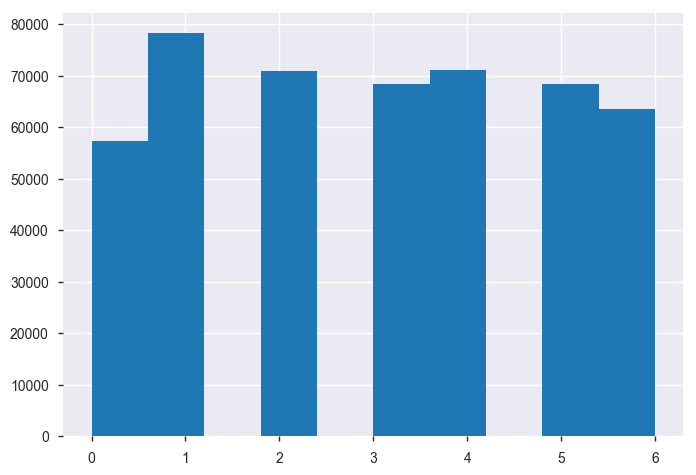

In [22]:
train.week.unique()
train.week.hist()

In [19]:
train.hour.unique()

array([10, 12,  3,  6, 19, 23, 22, 16,  2, 17, 11, 14,  0, 18, 15, 21,  8,
       20,  9, 13,  1,  7,  4,  5])

In [23]:
train.groupby(['hour']).size()

hour
0     10795
1      4486
2      2464
3      1889
4      1564
5      2336
6      5388
7     11014
8     15481
9     19927
10    24325
11    24082
12    24668
13    27500
14    27220
15    26871
16    24562
17    23450
18    25358
19    33737
20    41120
21    42756
22    35977
23    21168
dtype: int64

In [24]:
train.time.head()

AttributeError: 'DataFrame' object has no attribute 'time'